# Initial calibration

### Setup

In [1]:
import logging, logging.config
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pickle
import numpy as np
import pandas as pd
import yaml

from simulation_utils.preference import generate_lda
from simulation_utils.observation import sample_popular_n
from simulation_utils.utils import truncated_beta_binomial, truncated_pareto
from simulation_utils.datasets import ml_100k

import simulation_utils as sims_utils
%matplotlib inline

### Read data

In [2]:
data = ml_100k()
nusers = len(data['user'].unique())
nitems = len(data['item'].unique())

In [3]:
print(nusers, nitems)

943 1682


In [4]:
data.head()

,user,item,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### Check point

In [5]:
import os
import re

In [6]:
pattern = re.compile('calibrations_lda_.*.pkl')
filenames = [fn for fn in os.listdir('build') if pattern.match(fn)]

In [7]:
filenames

['calibrations_lda_unif_2019-03-01-16-26-20.pkl',
 'calibrations_lda_pop_2019-03-01-16-27-28.pkl']

In [8]:
results = []
for fn in filenames:
    path = os.path.join('build', fn)
    with open(path, 'rb') as f:
        result = pickle.load(f)
    results.extend(result)

In [9]:
res_df = pd.DataFrame(results)

In [10]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_k,pref_lam,pref_nitems,pref_nusers,user_activity_kl_divergence
0,0.398593,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,19.627790,1682,943,1.078711
1,0.449605,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,5,19.627790,1682,943,1.043786
2,0.255922,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,72.582412,1682,943,0.388435
3,0.215433,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,5,72.582412,1682,943,0.432237
4,0.270422,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,280.113911,1682,943,0.200413


In [11]:
res_df.shape

(1520, 15)

In [12]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['item_popularity_kl_divergence', 'user_activity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_k,pref_lam,pref_nitems,pref_nusers,user_activity_kl_divergence
773,0.193361,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,554.818427,1682,943,0.158205
765,0.200285,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,161.614276,1682,943,0.215452
6,0.206109,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,304.385283,1682,943,0.200997
777,0.207732,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,623.819990,1682,943,0.176553
763,0.209865,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,146.469624,1682,943,0.235659
3,0.215433,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,5,72.582412,1682,943,0.432237
847,0.216009,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,37,391.582513,1682,943,0.165163
769,0.216214,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,410.506944,1682,943,0.181601
767,0.218502,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,13,391.582513,1682,943,0.177239
768,0.226397,sample_popular_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,13,410.506944,1682,943,0.167215


In [13]:
res_df[res_df['item_popularity_kl_divergence'] < 2].sort_values(['user_activity_kl_divergence', 'item_popularity_kl_divergence']).head(10)

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_k,pref_lam,pref_nitems,pref_nusers,user_activity_kl_divergence
659,0.645976,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,188,850.354194,1682,943,0.128980
739,0.628269,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,191,850.354194,1682,943,0.136565
951,0.329709,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,39,1312.047043,1682,943,0.137646
637,0.728955,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,183,1513.604536,1682,943,0.137995
465,0.667082,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,136,1093.512622,1682,943,0.139030
155,0.679408,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,34,1485.857082,1682,943,0.139134
807,0.249470,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,35,391.582513,1682,943,0.139524
383,0.620662,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,108,1017.711151,1682,943,0.140009
981,0.331424,sample_popular_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,61,932.853125,1682,943,0.140060
555,0.727019,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,145,1485.857082,1682,943,0.140650


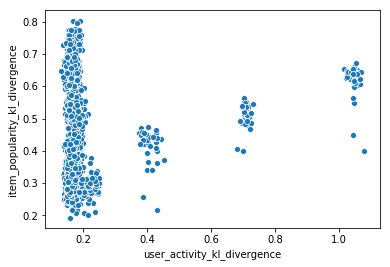

In [14]:
sns.scatterplot('user_activity_kl_divergence', 'item_popularity_kl_divergence', data=res_df[res_df['item_popularity_kl_divergence'] < 2])

### KL divergence vs. parameters

In [20]:
res_df_tall = res_df[['item_popularity_kl_divergence', 'obs_dist_func', 'pref_nitems', 'pref_nusers', 'pref_k', 'pref_lam', 'user_activity_kl_divergence']].melt(
    id_vars = ['obs_dist_func', 'pref_nitems', 'pref_nusers', 'pref_k', 'pref_lam'],
    value_vars=['item_popularity_kl_divergence', 'user_activity_kl_divergence'],
    var_name = 'statistics',
    value_name = 'score'
)

In [21]:
res_df_tall.head()

,obs_dist_func,pref_nitems,pref_nusers,pref_k,pref_lam,statistics,score
0,truncated_pareto,1682,943,5,19.627790,item_popularity_kl_divergence,0.398593
1,truncated_beta_binomial,1682,943,5,19.627790,item_popularity_kl_divergence,0.449605
2,truncated_pareto,1682,943,5,72.582412,item_popularity_kl_divergence,0.255922
3,truncated_beta_binomial,1682,943,5,72.582412,item_popularity_kl_divergence,0.215433
4,truncated_pareto,1682,943,5,280.113911,item_popularity_kl_divergence,0.270422


pref_k

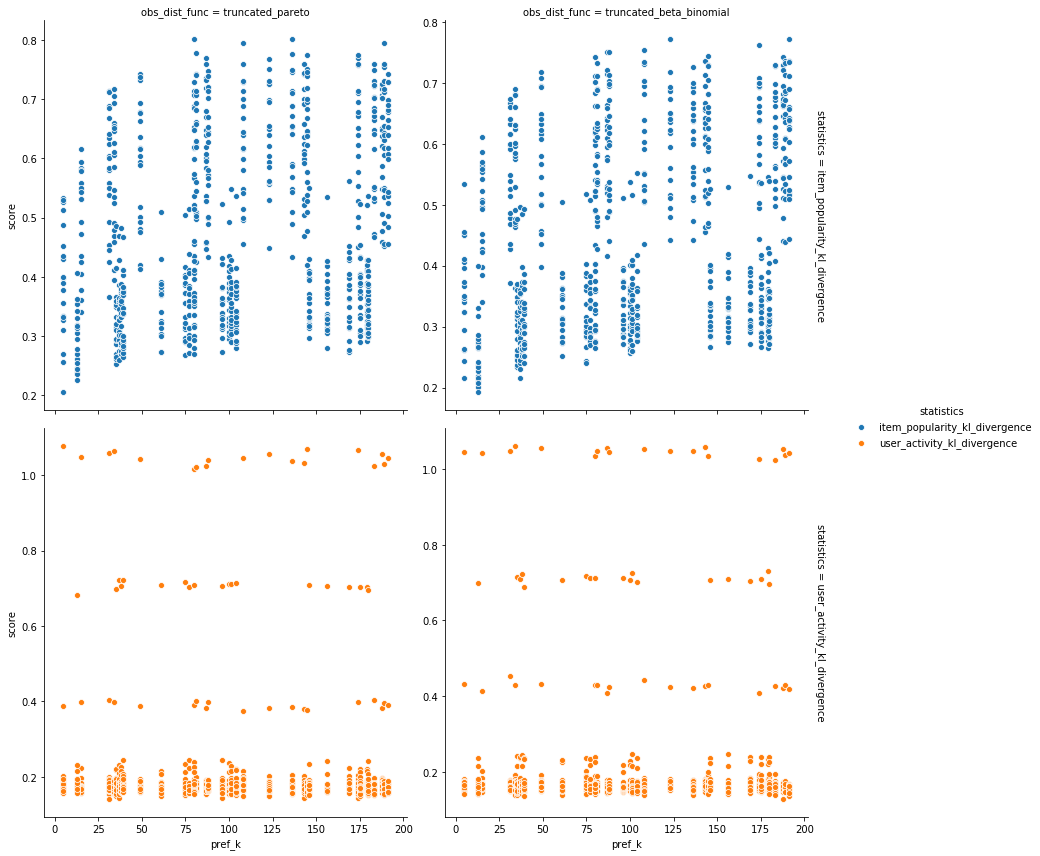

In [22]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_k', 'score')
     .add_legend()
     .set_axis_labels('pref_k', 'score'))

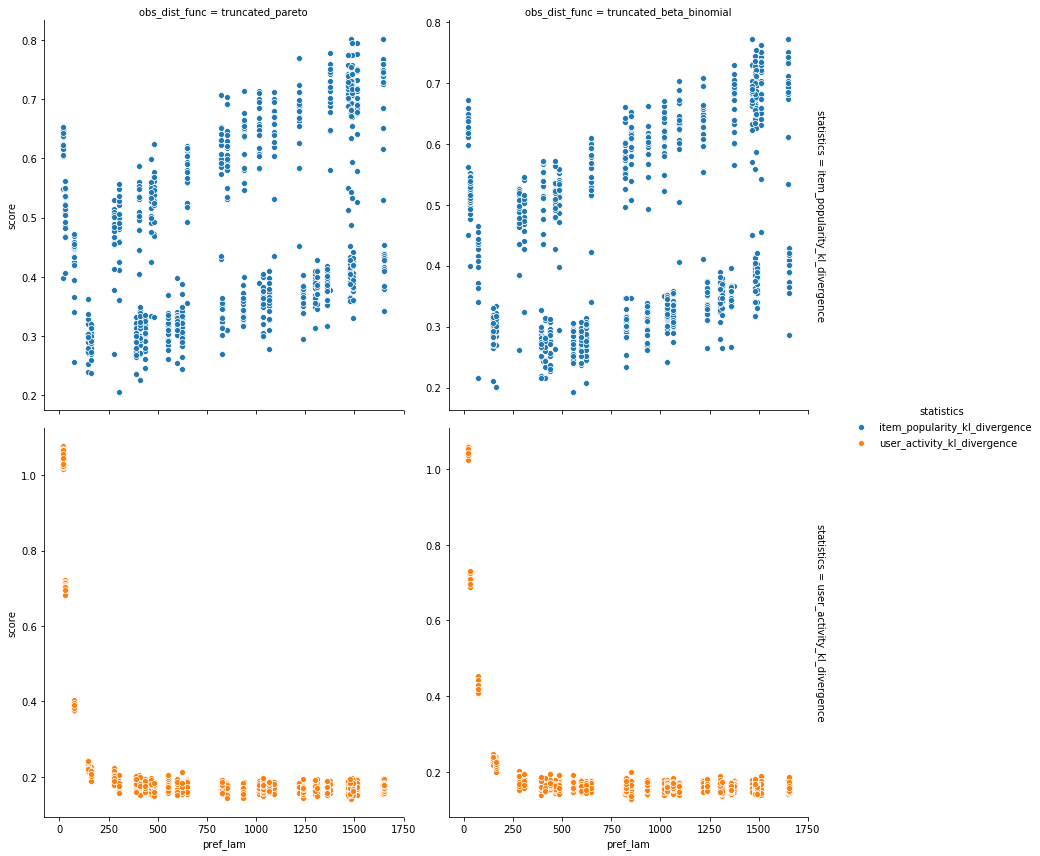

In [23]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', hue='statistics', row='statistics', height=6, sharey=False, margin_titles=True)
g = (g.map(sns.scatterplot, 'pref_lam', 'score')
     .add_legend()
     .set_axis_labels('pref_lam', 'score'))

In [28]:
def plot_scatter3d(x, y, z, c, **kwargs):
    ax = plt.gca()
    kwargs.pop('color')
    p = ax.scatter(x, y, z, c=c, **kwargs)
#     plt.colorbar(p, shrink=0.5, aspect=5)
    ax.set_zlabel('score')

In [29]:
cmap_name = None
cmap = plt.get_cmap(cmap_name)
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array(res_df_tall['score'])

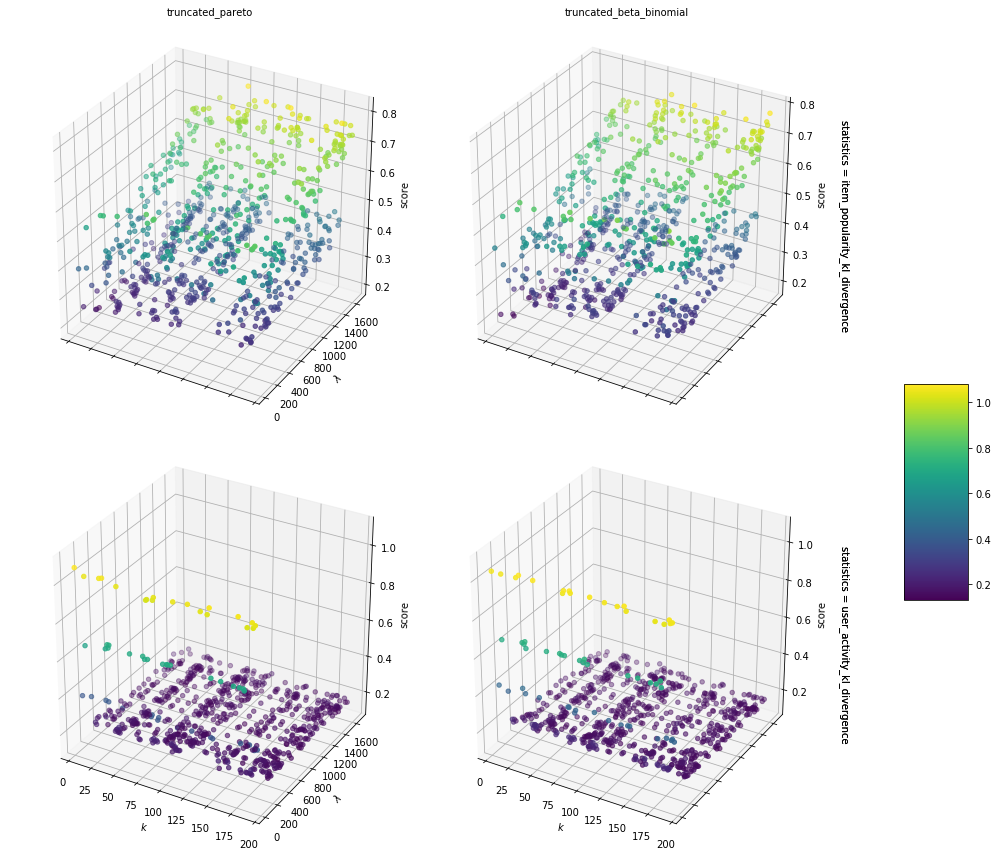

In [30]:
g = sns.FacetGrid(res_df_tall, col='obs_dist_func', row='statistics', height=6, margin_titles=True, subplot_kws=dict(projection='3d'))
g = (g.map(plot_scatter3d, 'pref_k', 'pref_lam', 'score', 'score', cmap=cmap)
     .set_titles(col_template='{col_name}')
     .set_axis_labels(r'$k$', r'$\lambda$'))
cax = g.fig.add_axes([1.05, 0.3, 0.075, 0.25])
plt.colorbar(sm, cax=cax)

Generate simulated data using the best parameters

In [33]:
def simulated_data_bb(nusers=943, nitems=1682, k=13, lam=554.818427):
#     pref = generate_ibp_df(943, 1009.2, 0.3, 0.8)
    pref = generate_lda(nusers, nitems, k, lam)
    obs = sample_popular_n(pref, truncated_beta_binomial, True, a=1.6638872003071793e-05, b=2.8157887296158077, n=737)
    return obs

In [35]:
def simulated_data_pareto(nusers=943, nitems=1682, k=13, lam=410.506944):
#     pref = generate_ibp_df(943, 1009.2, 10, 0)
    pref = generate_lda(nusers, nitems, k, lam)
    obs = sample_popular_n(pref, truncated_pareto, True, m=20.00000045, alpha=0.510528)
    return obs

In [36]:
def simulated_data(name, *args, **kwargs):
    out = None
    if 'TBB' in name:
        out = simulated_data_bb(*args, **kwargs)
    if 'TP' in name:
        out = simulated_data_pareto(*args, **kwargs)
    return out

In [37]:
# def simulated_data_geo():
#     pref = generate_ibp_df(943, 1009, 1, 0)
#     obs = sample_popular_n(pref, np.random.geometric, False, p=0.05)
#     return obs

In [38]:
def compute_density(data):
    nusers = len(data['user'].unique())
    nitems = len(data['item'].unique())
    npairs = len(data)
    density = npairs / nitems / nusers
    return nusers, nitems, npairs, density

In [39]:
def compute_data_stats(data):
    pairs = data.loc[:, ['user', 'item']]
    user_activity = pairs.groupby('user', as_index=False).count().rename(columns={'item': 'count'})
    item_popularity = pairs.groupby('item', as_index=False).count().rename(columns={'user': 'count'})
    return user_activity, item_popularity

In [40]:
def summarize_dataset(name, data_func, *args, **kwargs):
    dataset = data_func(*args, **kwargs)
    colname = dataset.columns
    if not {'user', 'item'}.issubset(colname):
        dataset.rename(columns={colname[0]: 'user',
                                colname[1]: 'item'},
                       inplace=True)
    dataset = dataset[['user', 'item']]
    data_meta = compute_density(dataset)
    data_meta_stats = tuple([name, *data_meta])
    
    user_activity, item_popularity = compute_data_stats(dataset)
    user_activity['dataset'] = name
    user_activity.drop('user', axis=1, inplace=True)
    item_popularity['dataset'] = name
    item_popularity.drop('item', axis=1, inplace=True)
    item_popularity['rank'] = item_popularity['count'].rank(method='min', ascending=False)

    user_activity_stats = user_activity['count'].rename(name).describe()
    item_popularity_stats = item_popularity['count'].rename(name).describe()
    return data_meta_stats, user_activity_stats, item_popularity_stats, user_activity, item_popularity

In [41]:
res_df['distance'] = res_df['item_popularity_kl_divergence'] ** 2 + res_df['user_activity_kl_divergence'] ** 2

In [42]:
res_df.head()

,item_popularity_kl_divergence,obs,obs_a,obs_alpha,obs_b,obs_dist_func,obs_m,obs_n,obs_use_cap,pref,pref_k,pref_lam,pref_nitems,pref_nusers,user_activity_kl_divergence,distance
0,0.398593,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,19.627790,1682,943,1.078711,1.322494
1,0.449605,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,5,19.627790,1682,943,1.043786,1.291634
2,0.255922,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,72.582412,1682,943,0.388435,0.216378
3,0.215433,sample_uniform_n,0.000017,NaN,2.815789,truncated_beta_binomial,NaN,737.0,True,generate_lda,5,72.582412,1682,943,0.432237,0.233240
4,0.270422,sample_uniform_n,NaN,0.510528,NaN,truncated_pareto,20.0,NaN,True,generate_lda,5,280.113911,1682,943,0.200413,0.113293


In [43]:
res_params = res_df[['obs_dist_func', 'pref_nusers', 'pref_nitems', 'pref_k', 'pref_lam', 'item_popularity_kl_divergence', 'user_activity_kl_divergence', 'distance']]

In [44]:
res_params.head()

,obs_dist_func,pref_nusers,pref_nitems,pref_k,pref_lam,item_popularity_kl_divergence,user_activity_kl_divergence,distance
0,truncated_pareto,943,1682,5,19.627790,0.398593,1.078711,1.322494
1,truncated_beta_binomial,943,1682,5,19.627790,0.449605,1.043786,1.291634
2,truncated_pareto,943,1682,5,72.582412,0.255922,0.388435,0.216378
3,truncated_beta_binomial,943,1682,5,72.582412,0.215433,0.432237,0.233240
4,truncated_pareto,943,1682,5,280.113911,0.270422,0.200413,0.113293


In [48]:
NPARAMS = 10
ip_params = res_params.sort_values(['obs_dist_func', 'item_popularity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
ua_params = res_params.sort_values(['obs_dist_func', 'user_activity_kl_divergence']).groupby('obs_dist_func').head(NPARAMS)
d_params = res_params.sort_values(['obs_dist_func', 'distance']).groupby('obs_dist_func').head(NPARAMS)

In [49]:
from itertools import repeat

In [50]:
def summarize_datasets(params):
    from multiprocessing import Pool
    params = params.join(params.groupby('obs_dist_func').cumcount().rename('param_no'))
    params['name'] = params['obs_dist_func'].map(lambda x: ''.join(next(zip(*x.split('_')))).upper()) + params['param_no'].map(str)
    params = zip(params['name'].values, repeat(simulated_data), 
                 *params[['name', 'pref_nusers', 'pref_nitems', 'pref_k', 'pref_lam']].to_dict('list').values()) 
    with Pool(10) as p:
        results = p.starmap(summarize_dataset, params)
    simulated_results = zip(*results)
    ml_100k_results = summarize_dataset('ml_100k', ml_100k)
    df = pd.DataFrame.from_records([ml_100k_results[0], *next(simulated_results)],
                               columns=['dataset', 'nusers', 'nitems', 'npairs', 'density'])
    print('dataset stats')
    print(df)

    df = pd.concat([ml_100k_results[1], *next(simulated_results)], axis=1)
    print('user profile stats')
    print(df)

    df = pd.concat([ml_100k_results[2], *next(simulated_results)], axis=1)
    print('item popularity stats')
    print(df)

    user_profile_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)

    item_popularity_df = pd.concat(next(simulated_results), axis=0, ignore_index=True)
    return ml_100k_results[3:], user_profile_df, item_popularity_df

#### Top10 parameters sorted by item popularity KL

In [51]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ip_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1567  101976  0.069011
2      TBB1     943    1591   77329  0.051542
3      TBB2     943    1578  103741  0.069716
4      TBB3     943    1589   74219  0.049531
5      TBB4     943    1531   50574  0.035030
6      TBB5     943    1611  100959  0.066457
7      TBB6     943    1556   97457  0.066419
8      TBB7     943    1572   99506  0.067125
9      TBB8     943    1564   99774  0.067650
10     TBB9     943    1595  103138  0.068572
11      TP0     943    1543   91512  0.062893
12      TP1     943    1600   99767  0.066123
13      TP2     943    1581   94612  0.063460
14      TP3     943    1594   73305  0.048768
15      TP4     943    1591   70220  0.046804
16      TP5     943    1589  102695  0.068535
17      TP6     943    1590   99222  0.066176
18      TP7     943    1616   69318  0.045488
19      TP8     943    1587  112051  0.074873
20      TP9     943 

In [52]:
def plot_scatter_against_baseline(*args, **kwargs):
    data = pd.concat(args, axis=1)
    data['dataset'] = kwargs.get('label')
    base = kwargs.pop('baseline')
    data = data.append(base[data.columns], ignore_index=True)
    args = map(lambda x: x.name, args)
    kwargs['label'] = data['dataset'].unique()
    ax = sns.scatterplot(*args, data=data, **kwargs)
    return ax

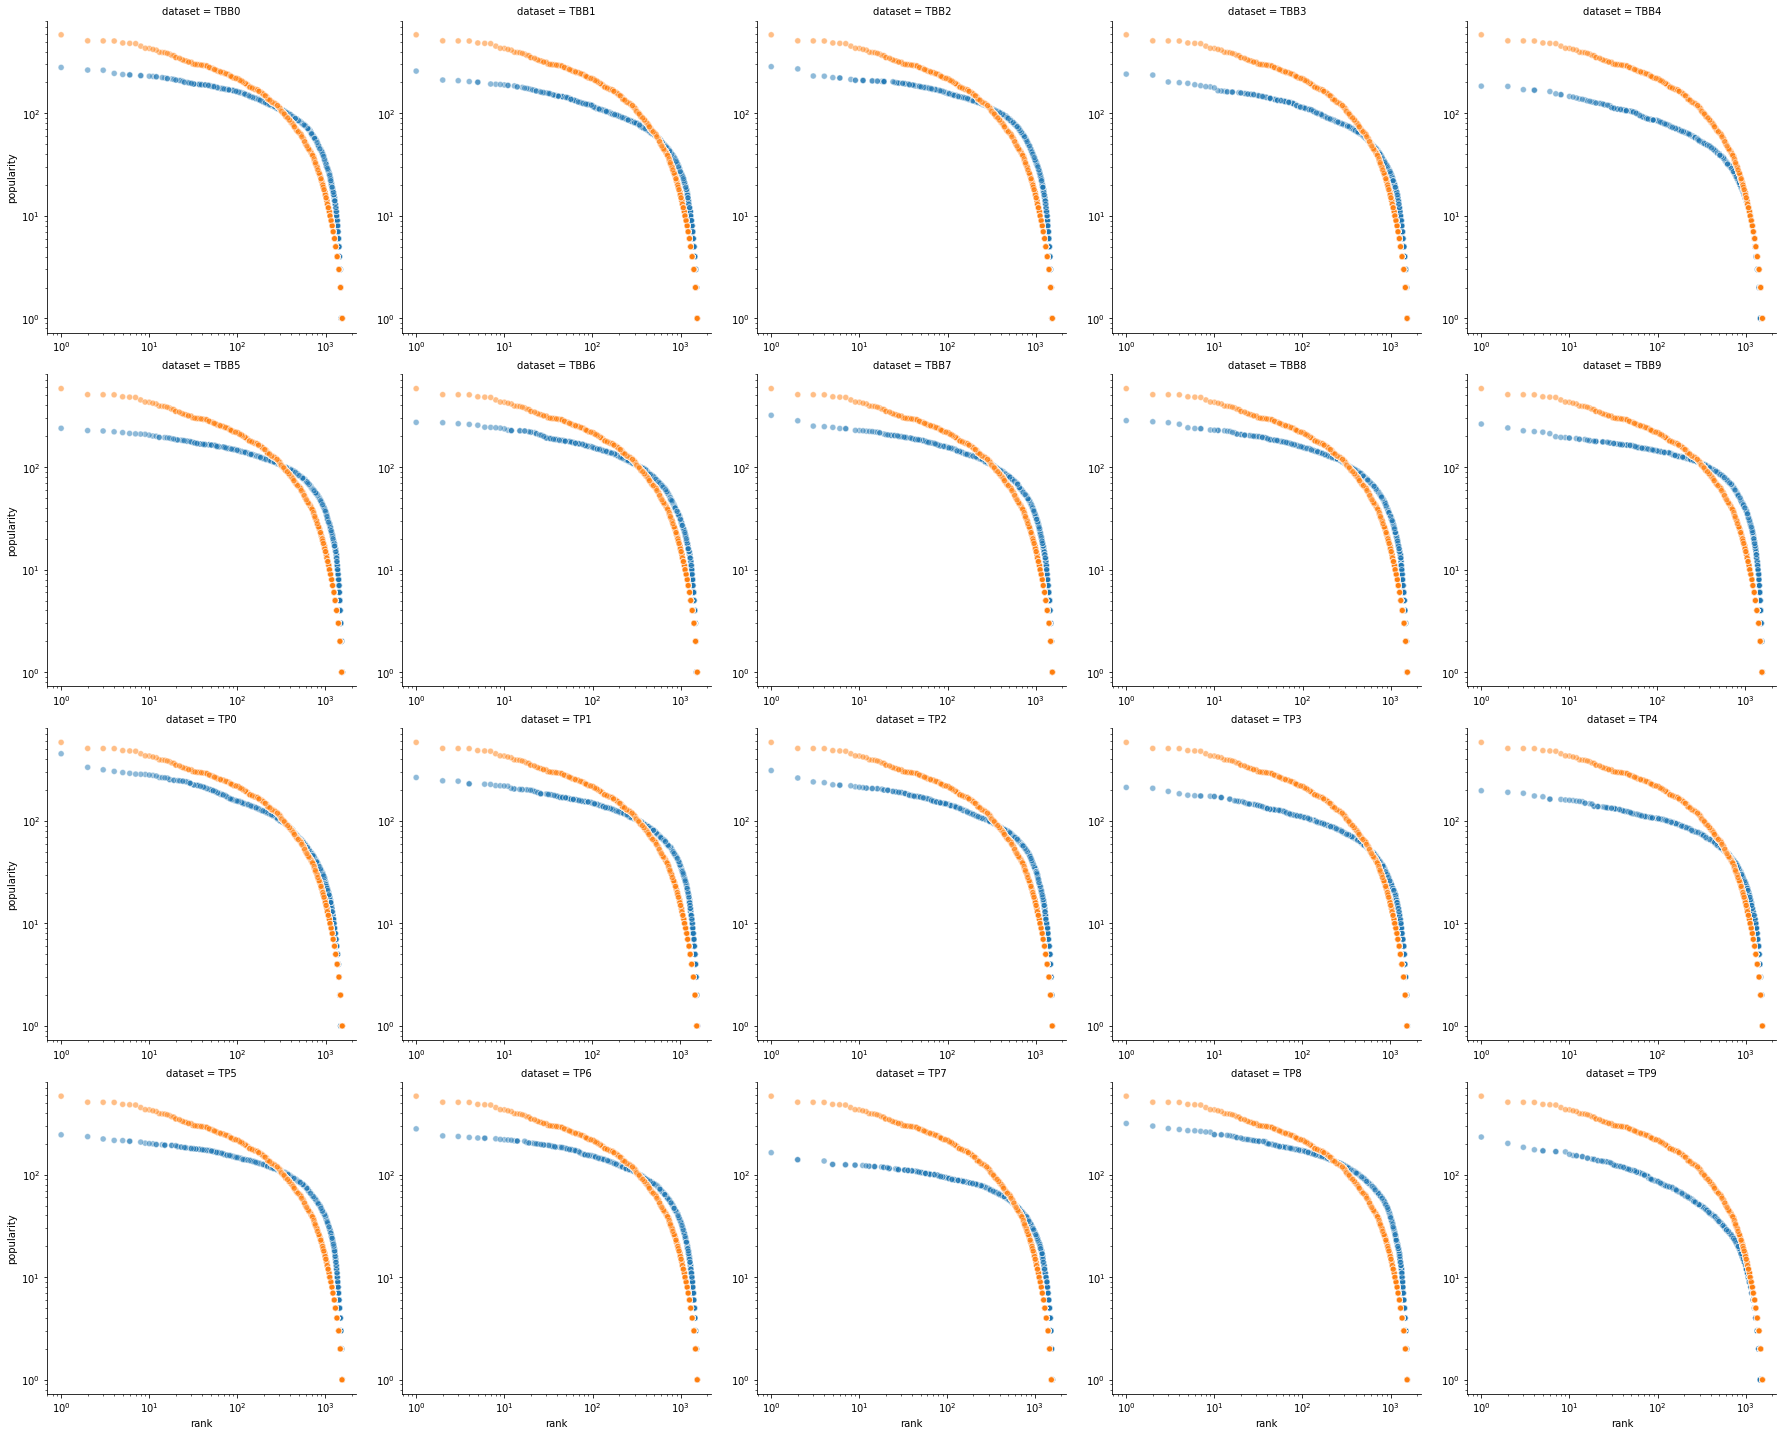

In [53]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [54]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

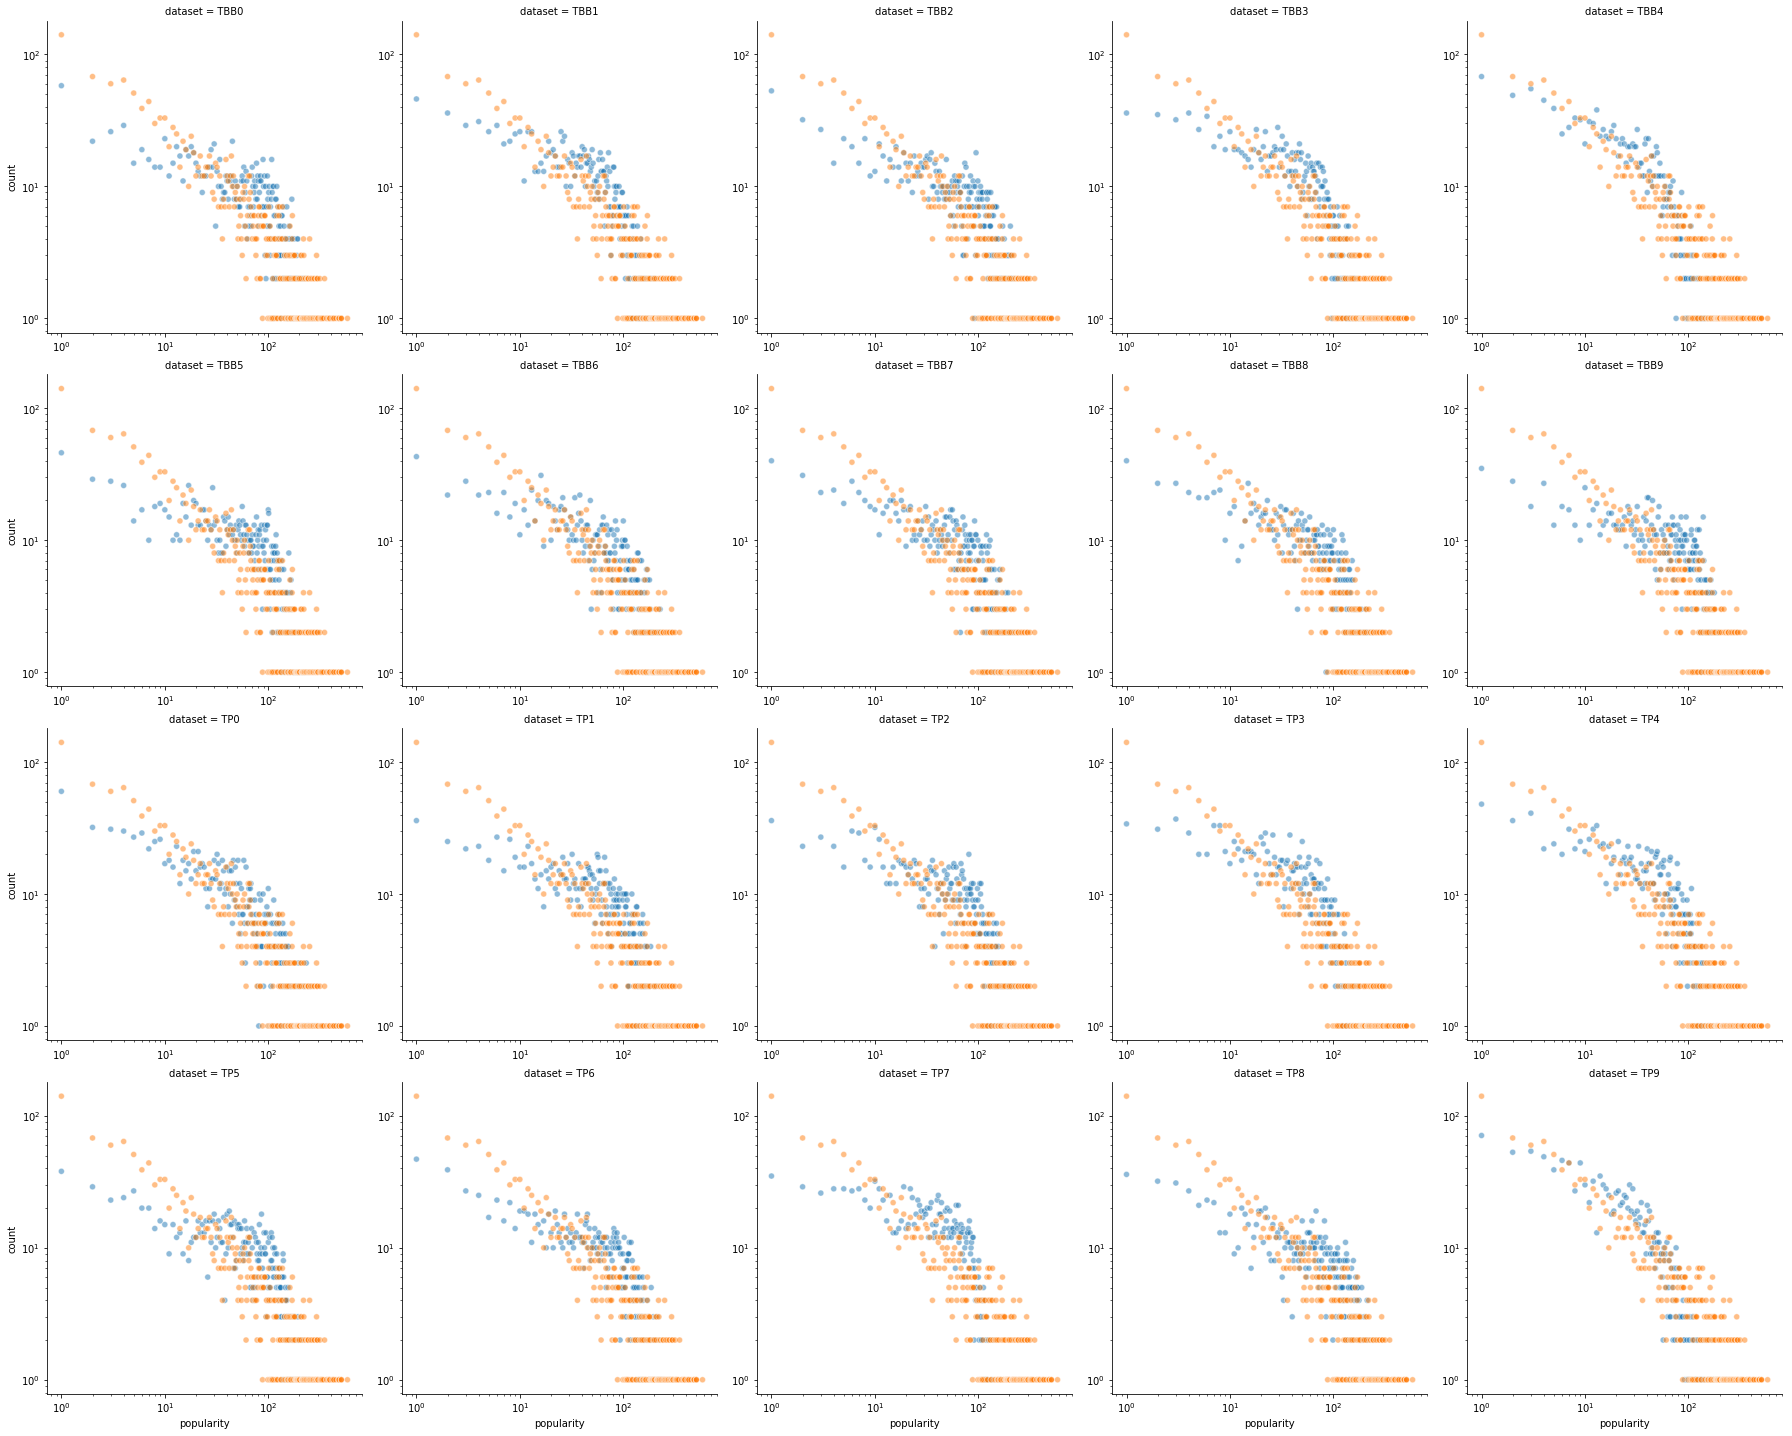

In [55]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by user activity KL

In [57]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(ua_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682  102396  0.064557
2      TBB1     943    1682  104406  0.065825
3      TBB2     943    1682  104406  0.065825
4      TBB3     943    1682  104406  0.065825
5      TBB4     943    1682  104406  0.065825
6      TBB5     943    1682  104406  0.065825
7      TBB6     943    1682  104406  0.065825
8      TBB7     943    1682  104406  0.065825
9      TBB8     943    1682  104406  0.065825
10     TBB9     943    1682  104406  0.065825
11      TP0     943    1682  103682  0.065368
12      TP1     943    1682  122905  0.077488
13      TP2     943    1682  111589  0.070353
14      TP3     943    1682  106357  0.067055
15      TP4     943    1682  111588  0.070353
16      TP5     943    1682  106135  0.066915
17      TP6     943    1682  106295  0.067015
18      TP7     943    1682  108556  0.068441
19      TP8     943    1682  108593  0.068464
20      TP9     943 

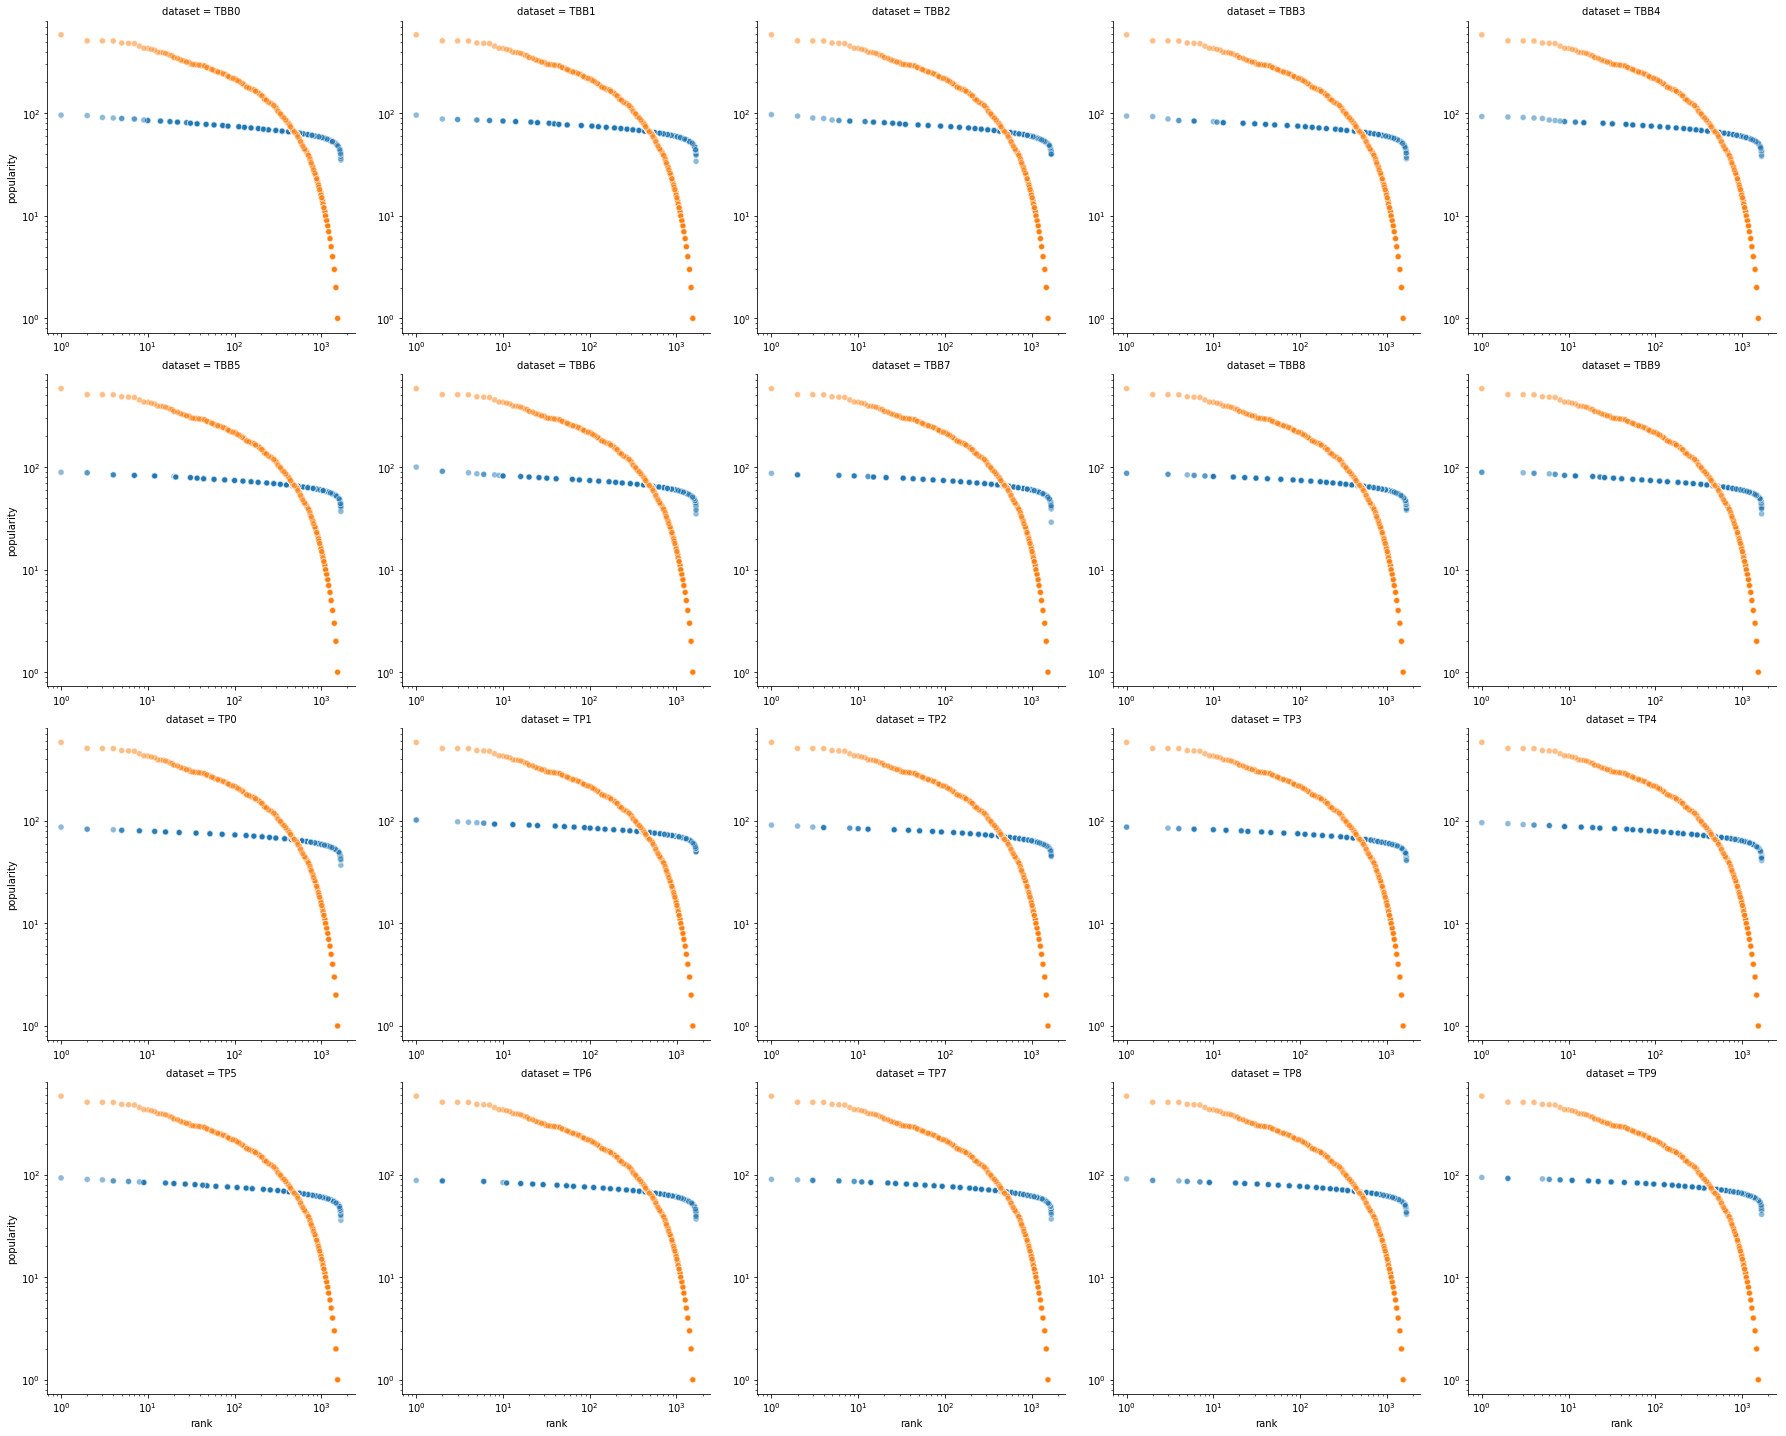

In [58]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [59]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

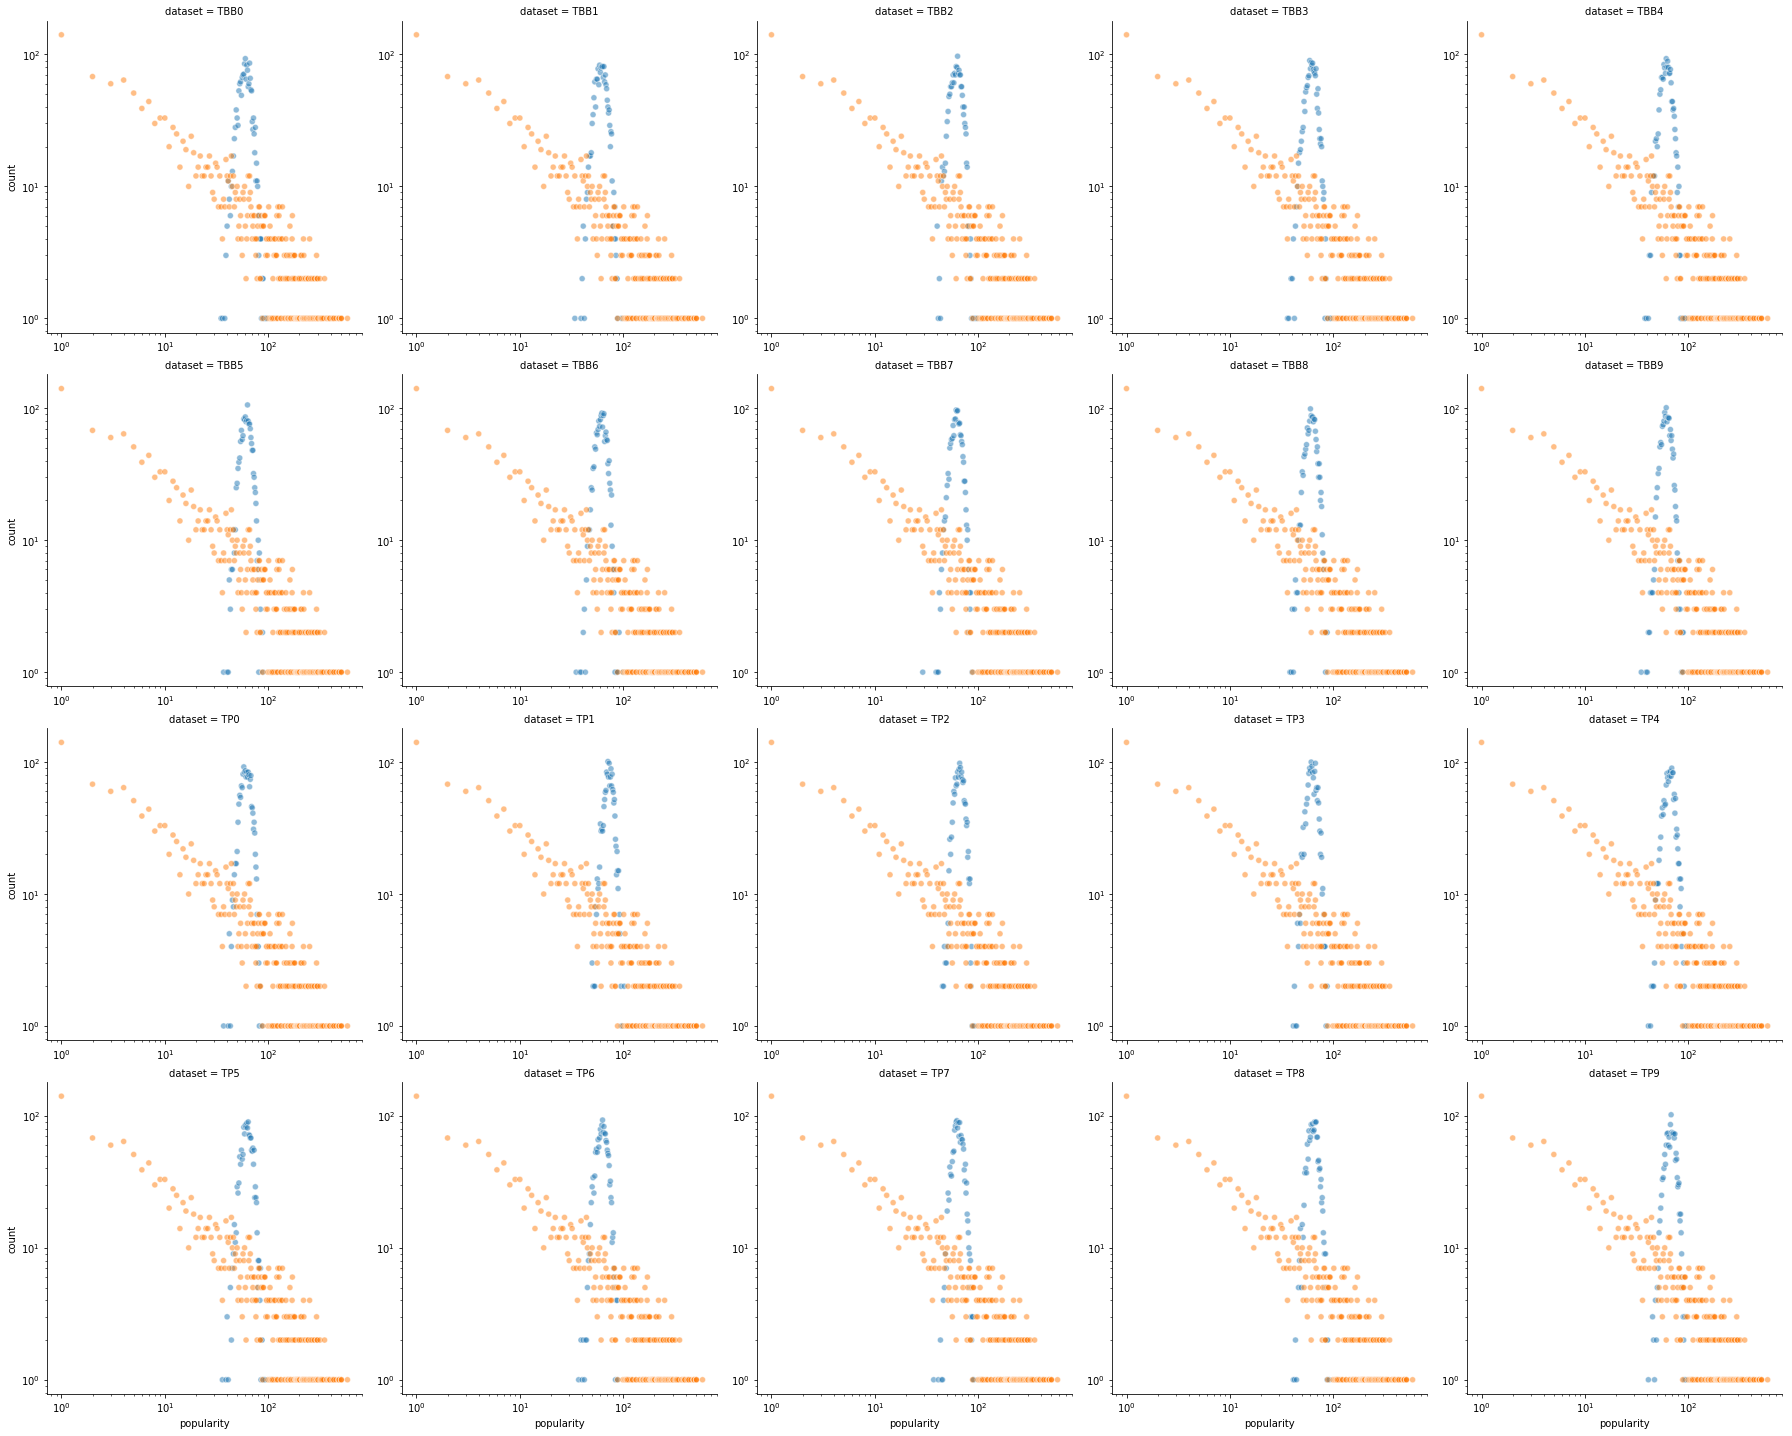

In [60]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

#### Top10 parameters sorted by sum of squares of item popularity and user activity KL

In [61]:
ml_100k_results, user_profile_df, item_popularity_df = summarize_datasets(d_params)

dataset stats
    dataset  nusers  nitems  npairs   density
0   ml_100k     943    1682  100000  0.063047
1      TBB0     943    1682   39773  0.025076
2      TBB1     943    1682   83427  0.052598
3      TBB2     943    1682  102396  0.064557
4      TBB3     943    1682  104406  0.065825
5      TBB4     943    1682  104406  0.065825
6      TBB5     943    1682  104406  0.065825
7      TBB6     943    1682  104406  0.065825
8      TBB7     943    1682  104406  0.065825
9      TBB8     943    1682  104406  0.065825
10     TBB9     943    1682  104406  0.065825
11      TP0     943    1682   38492  0.024268
12      TP1     943    1682   77548  0.048891
13      TP2     943    1682  106263  0.066995
14      TP3     943    1682  111130  0.070064
15      TP4     943    1682  103682  0.065368
16      TP5     943    1682  122905  0.077488
17      TP6     943    1682  106295  0.067015
18      TP7     943    1682  106261  0.066994
19      TP8     943    1682  111589  0.070353
20      TP9     943 

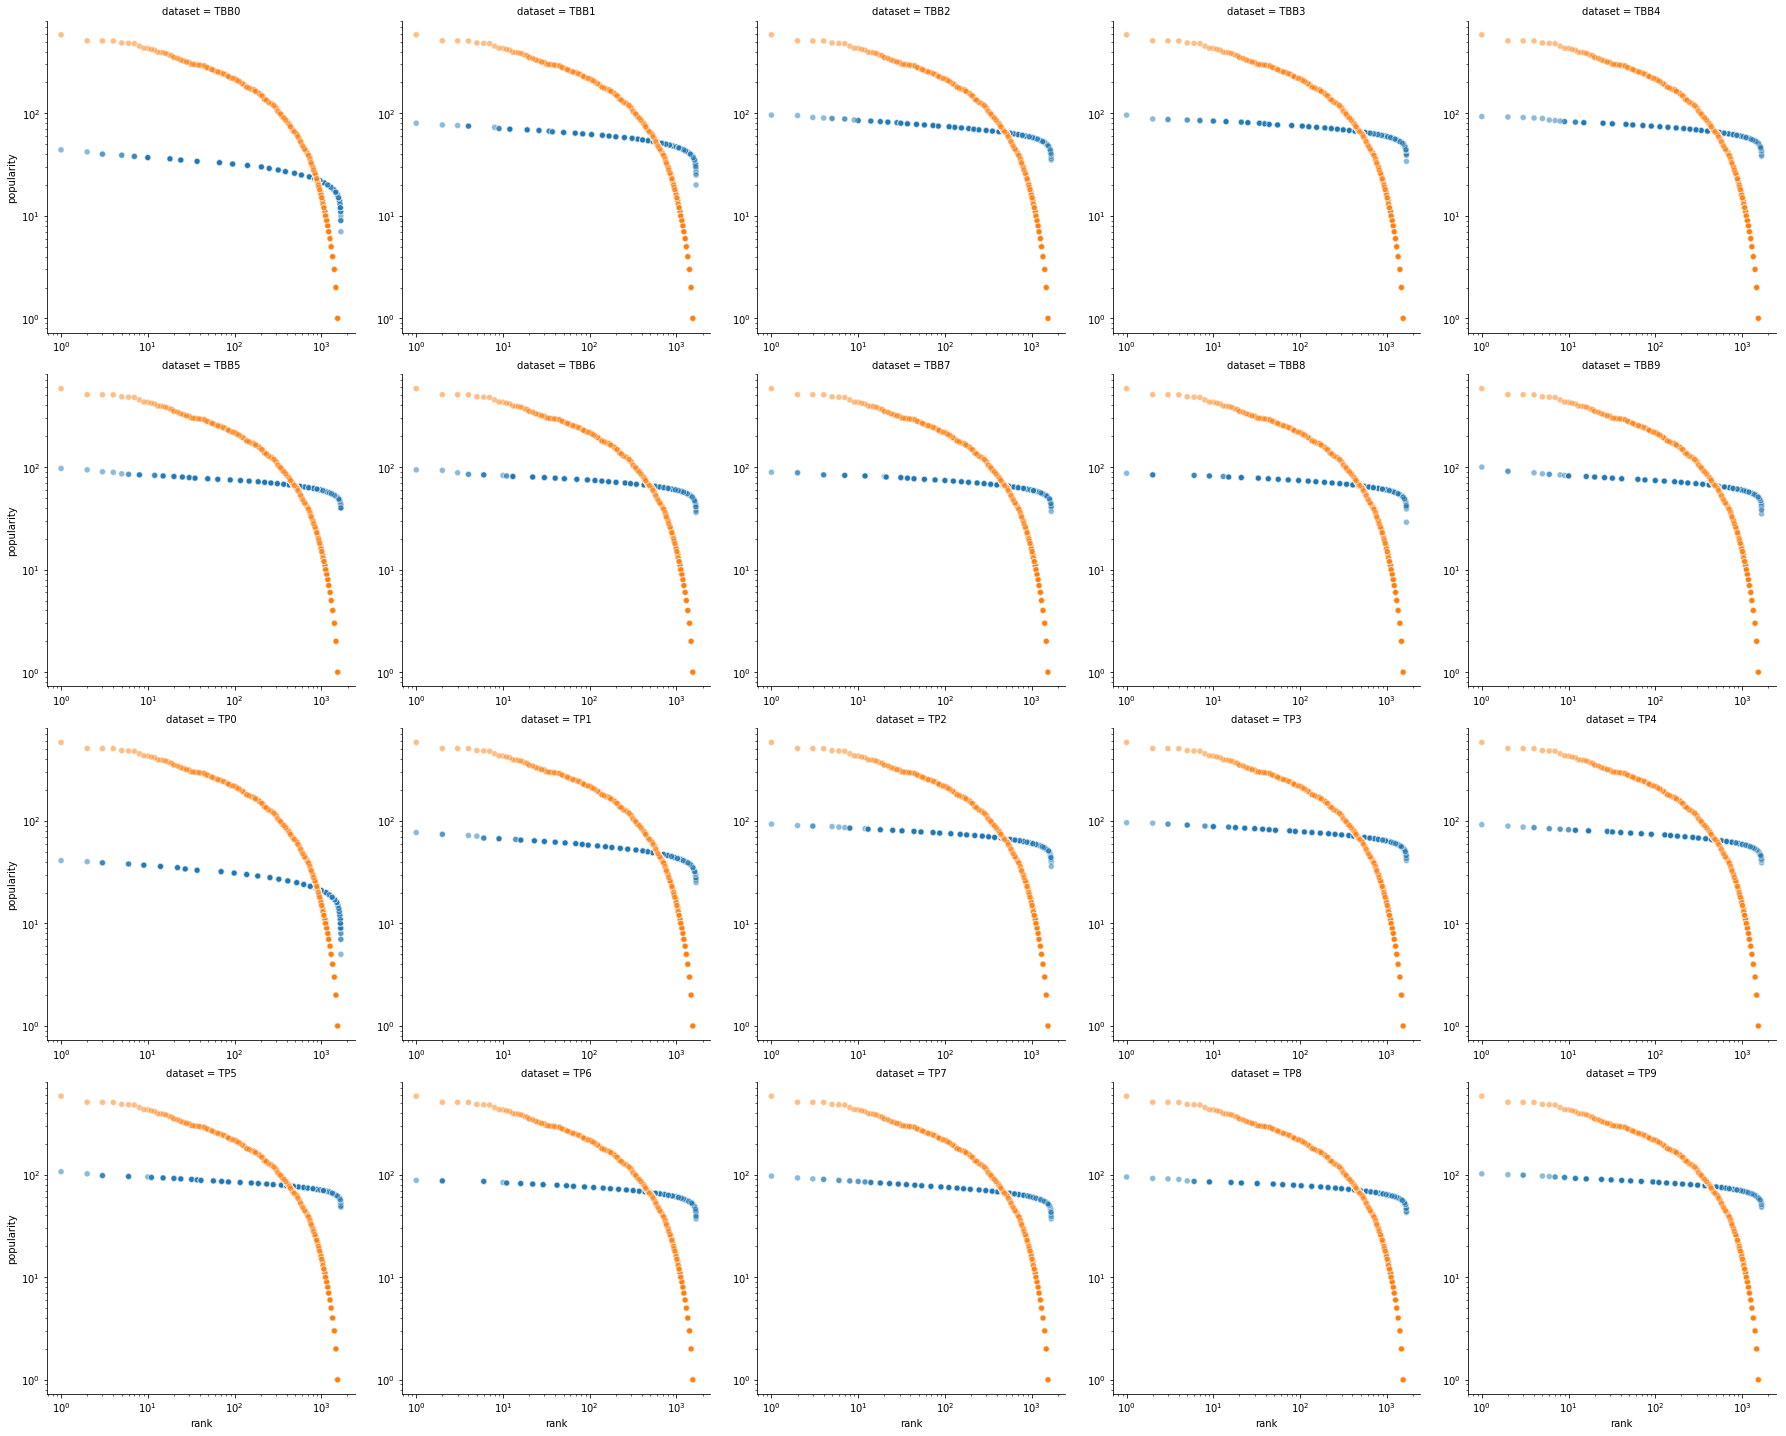

In [62]:
g = sns.FacetGrid(item_popularity_df, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'rank', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_results[1])
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity'))

In [63]:
popularity_counts = (item_popularity_df[['dataset', 'count']].groupby(['dataset', 'count'])
                     .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))
ml_100k_pop_counts = (ml_100k_results[1][['dataset', 'count']].groupby(['dataset', 'count'])
                      .size().reset_index().rename(columns={'count': 'popularity', 0: 'count'}))

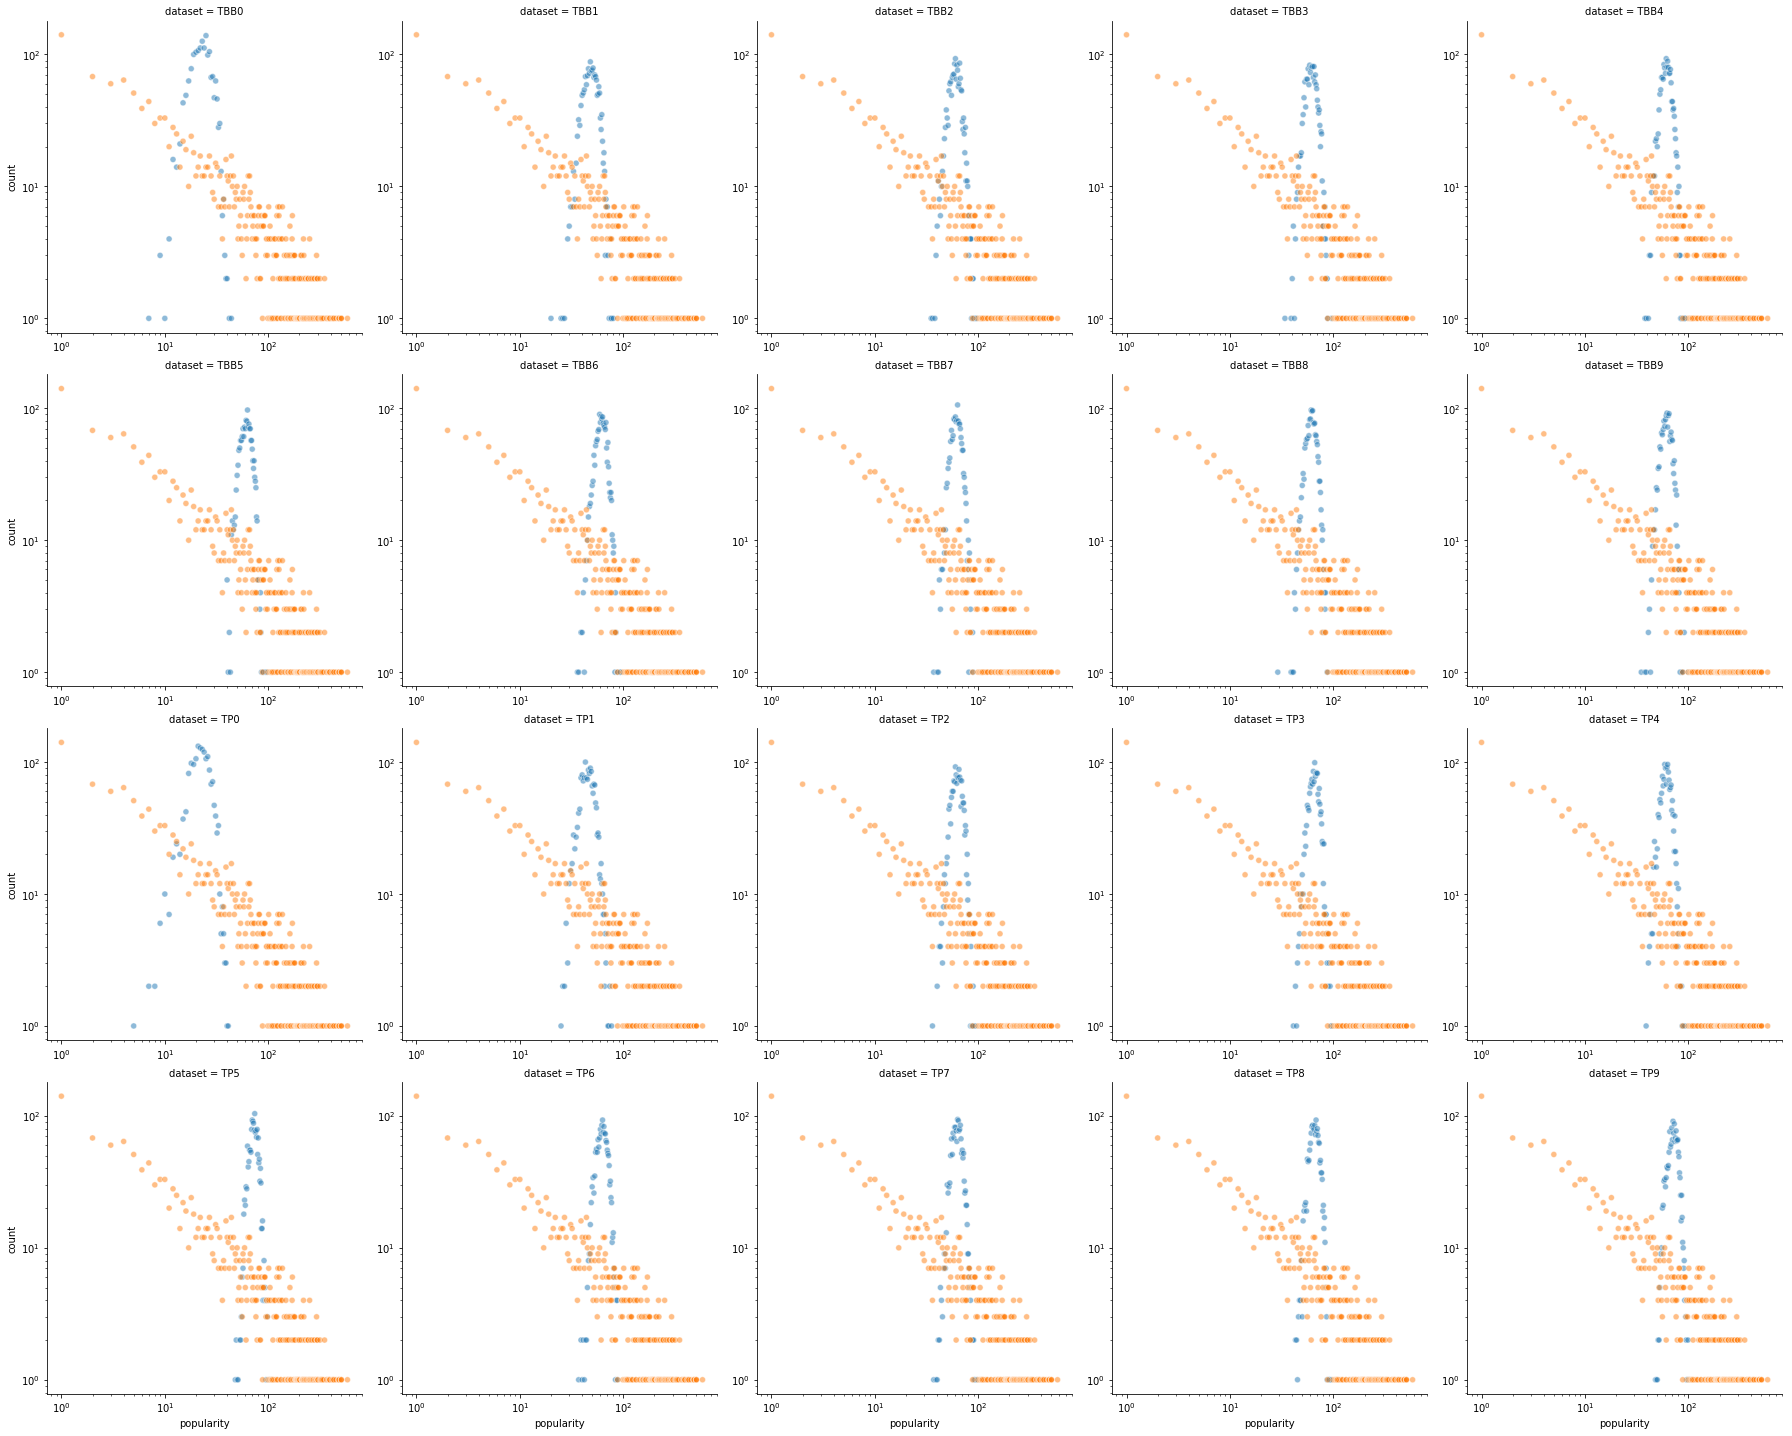

In [64]:
g = sns.FacetGrid(popularity_counts, col='dataset', hue='dataset', sharex=False, sharey=False, col_wrap=5, height=5)
g = (g.map(plot_scatter_against_baseline, 'popularity', 'count', hue='dataset', alpha=0.5, baseline=ml_100k_pop_counts)
     .set(xscale='log', yscale='log'))

In [65]:
user_profile_model1 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
user_profile_model1['group'] = 1
user_profile_model2 = user_profile_df[user_profile_df['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
user_profile_model2['group'] = 2
user_profile_models = pd.concat([user_profile_model1, user_profile_model2])

In [ ]:
g = sns.FacetGrid(user_profile_models.groupby(['group', 'dataset', 'item'], as_index=False).count().sort_values(['group', 'dataset', 'item']), col='group', hue='dataset', height=6)
g = (g.map(sns.scatterplot, 'item', 'user', alpha=0.7)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))

In [ ]:
g = sns.FacetGrid(user_profile_models, col='group', hue='dataset', height=6)
g = (g.map(sns.distplot, 'item', kde=False)
     .add_legend()
     .set_axis_labels('user profile size', 'number of users'))
plt.show()

In [58]:
item_popularity_df.head()

,item,user,dataset,rank
0,1,452,ml_100k,8.0
1,2,131,ml_100k,239.0
2,3,90,ml_100k,372.0
3,4,209,ml_100k,107.0
4,5,86,ml_100k,388.0


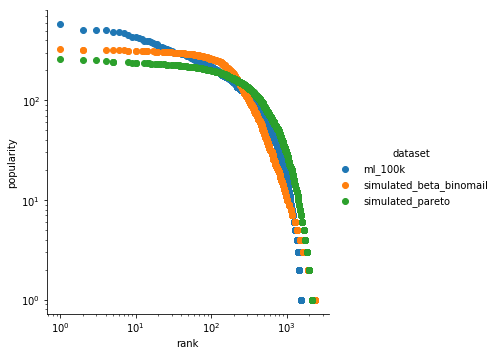

In [59]:
g = sns.FacetGrid(item_popularity_df, hue='dataset', height=5)
g = (g.map(plt.scatter, 'rank', 'user')
     .set(xscale='log', yscale='log')
     .set_axis_labels('rank', 'popularity')
     .add_legend())

In [60]:
count_popularity.head()

,dataset,user,count
0,ml_100k,1,141
1,ml_100k,2,68
2,ml_100k,3,60
3,ml_100k,4,64
4,ml_100k,5,51


In [50]:
count_popularity_model1 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_beta_binomail'])].copy()
count_popularity_model1['group'] = 1
count_popularity_model2 = count_popularity[count_popularity['dataset'].isin(['ml_100k', 'simulated_pareto'])].copy()
count_popularity_model2['group'] = 2
count_popularity_models = pd.concat([count_popularity_model1, count_popularity_model2])

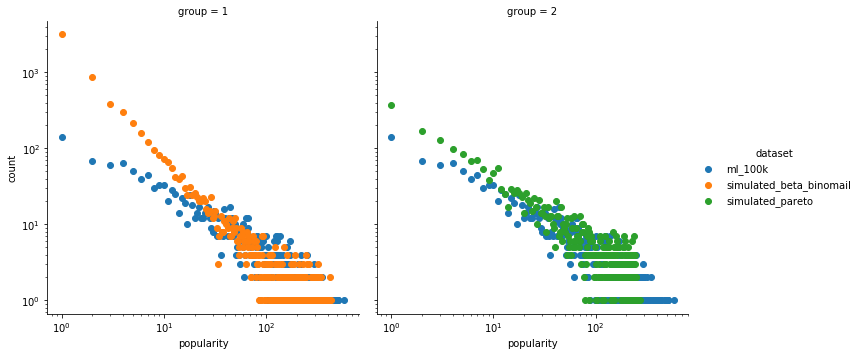

In [51]:
g = sns.FacetGrid(count_popularity_models, col='group', hue='dataset', height=5)
g = (g.map(plt.scatter, 'user', 'count')
     .set(xscale='log', yscale='log')
     .set_axis_labels('popularity', 'count').add_legend())

In [246]:
from scipy.stats import entropy

In [247]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count')

In [248]:
p = np.ones(max(tall_popularity_count['ml_100k'].dropna().index))

In [249]:
p[tall_popularity_count['ml_100k'].dropna().index.values - 1] += tall_popularity_count['ml_100k'].dropna().values

In [250]:
p /= p.sum()

In [251]:
q = np.ones(max(tall_popularity_count['simulated_beta_binomail'].dropna().index))

In [252]:
q[tall_popularity_count['simulated_beta_binomail'].dropna().index.values - 1] += tall_popularity_count['simulated_beta_binomail'].dropna().values

In [253]:
q /= q.sum()

In [254]:
lb = min(len(q), len(p))

In [255]:
entropy(q[:lb], p[:lb])

0.09075708186382384

In [256]:
tall_popularity_count = count_popularity_model1.pivot_table(index='user', columns='dataset', values='count', fill_value=0)

In [257]:
p = tall_popularity_count['ml_100k'] + 1

In [258]:
p /= p.sum()

In [259]:
q = tall_popularity_count['simulated_beta_binomail'] + 1

In [260]:
q /= q.sum()

In [261]:
entropy(q, p)

0.23545846119972072